
# EDA Notebook


## Imports:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

customers = pd.read_csv('data/olist_customers_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
product_category = pd.read_csv('data/product_category_name_translation.csv')
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')

- We have decided to eliminate `geolocation`, `product_category_names`, `seller data`, and `order_payments` from our analysis
- Explanation for the elimination of each dataset:
    - `geolocation`: We were unfamiliar with geolocation data and did not believe we could correctly utlize this data
    - `product_category_names`: We believe the language of the product category is irrelavant to product recommendation
    - `order_payments`: 
    - `seller data`: 

## Exploration

### Finding null values for each dataset

In [4]:
# `olist_customers_dataset`
nullCountCust = customers.isnull().value_counts()
print(nullCountCust)

customer_id  customer_unique_id  customer_zip_code_prefix  customer_city  customer_state
False        False               False                     False          False             99441
dtype: int64


In [5]:
# `olist_orders_dataset.csv`
nullCountOrders = orders.isnull().value_counts()
nullCountOrders

order_id  customer_id  order_status  order_purchase_timestamp  order_approved_at  order_delivered_carrier_date  order_delivered_customer_date  order_estimated_delivery_date
False     False        False         False                     False              False                         False                          False                            96461
                                                                                  True                          True                           False                             1636
                                                                                  False                         True                           False                             1183
                                                               True               True                          True                           False                              146
                                                                                  False            

### In regards to the findings above for the orders table

#### we find that null values show up in the following columns (order_approved_at, order_delivered_carrier_date, order_delivered_customer_date) for the table of orders

In [49]:
nullCountItems = order_items.isnull().value_counts()
print(nullCountItems)    

order_id  order_item_id  product_id  seller_id  shipping_limit_date  price  freight_value
False     False          False       False      False                False  False            112650
dtype: int64


### In regards to the findings above for the order items table - we find that there are no null values in any of the columns

#### The following code inspects the data types for each feature

In [50]:
print(customers.dtypes)
print()
print(orders.dtypes)
print()
print(order_items.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


# Finding the Number of Orders for each customer
- finding min max for number of orders for each person 
- mean and median number of orders per person

In [60]:
customers_orders = pd.merge(customers, orders, on='customer_id')
customer_items = pd.merge(customers_orders, order_items, on='order_id')
print(customer_items)
print(customers_orders)

96096
                             customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2       4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3       b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4       4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                  ...                               ...   
112645  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
112646  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
112647  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
112648  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
112649  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

        customer_zip_code_prefix          customer_city c


- finding min max for number of orders for each person 

In [52]:
# Median and Mode for number of orders per customer
print(customers_orders["customer_unique_id"].value_counts().median())
print(customers_orders["customer_unique_id"].value_counts().mean())

1.0
1.0348089410589412


In [53]:
numberOrdersPerCustomer = customers_orders["customer_unique_id"].value_counts()
print(numberOrdersPerCustomer)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64


# Visualization - Number of Orders for each customer

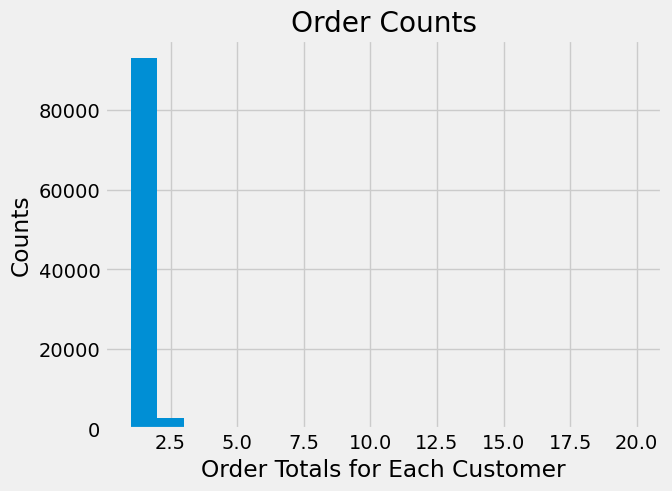

In [54]:
plt.style.use('fivethirtyeight')
hist = plt.hist(numberOrdersPerCustomer, bins=range(1,21))
plt.ylabel("Counts")
plt.xlabel('Order Totals for Each Customer')
plt.title("Order Counts")
plt.show()

# Items per Order
- finding min max for the Items per Order
- mean and median for Items per Order

In [55]:
numberItemsPerOrder = (customer_items.groupby("order_id")["order_item_id"].max())
temp = (customer_items.groupby("order_id")["order_item_id"].max())

print(numberItemsPerOrder.mean())
print(numberItemsPerOrder.median())
print(numberItemsPerOrder.value_counts())

1.1417306873695092
1.0
1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
10        8
12        5
11        4
9         3
15        2
14        2
20        2
13        1
21        1
Name: order_item_id, dtype: int64


# Visualization - Number of Items per Order

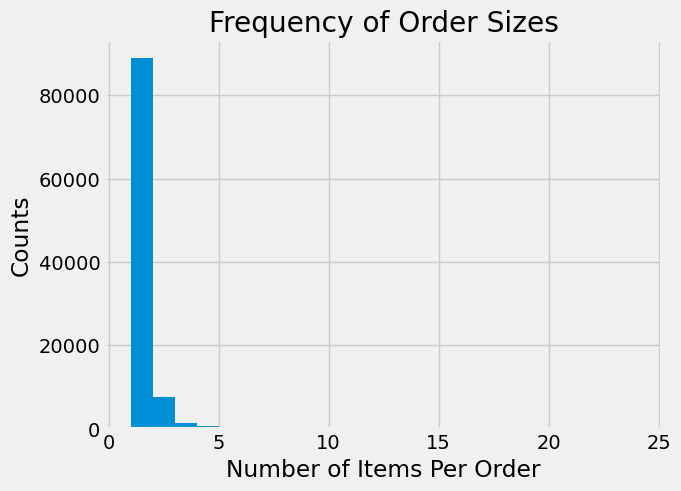

In [56]:
plt.style.use('fivethirtyeight')
hist = plt.hist(numberItemsPerOrder, bins=range(1,25))
plt.ylabel("Counts")
plt.xlabel('Number of Items Per Order')
plt.title("Frequency of Order Sizes")
plt.show()

## Products
products = pd.read_csv('data/olist_products_dataset.csv')
product_category = pd.read_csv('data/product_category_name_translation.csv')